# Node Classification Comparison self_supervised_loss

In [1]:
import sys
sys.path.append('../')
import torch_geometric.transforms as T
import torch

from stable_gnn.pipelines.node_classification_pipeline import TrainModelNC, TrainModelOptunaNC
from stable_gnn.graph import Graph


In [2]:
root = '../data_validation/'
name='texas'
dataset = Graph(root=root + str(name), name=name, transform=T.NormalizeFeatures(),adjust_flag=False)
data = dataset[0]
len(data.edge_index[0])

325

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_name = 'APP'
ssl_flag = False
optuna_training = TrainModelOptunaNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)

best_values = optuna_training.run(number_of_trials=50)
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)

model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(best_values, plot_training_procces=True)
print('SSL flag: ', ssl_flag,'test f1-score: ', test_acc_mi)

[I 2023-11-27 17:05:03,188] A new study created in memory with name: no-name-b0584ac9-8bd0-4a83-aa27-02ea2a99e297
[I 2023-11-27 17:05:03,291] A new study created in memory with name: no-name-15ace1eb-c71e-48e6-a8a1-07d8e2c3829a
[I 2023-11-27 17:05:05,437] Trial 0 finished with value: 5.680613994598389 and parameters: {'hidden_layer': 32, 'dropout': 0.30000000000000004, 'size of network, number of convs': 2, 'lr': 0.00531255489021862, 'num_negative_samples': 6, 'alpha': 0.8}. Best is trial 0 with value: 5.680613994598389.
[I 2023-11-27 17:05:07,139] Trial 1 finished with value: 3.2027463912963867 and parameters: {'hidden_layer': 64, 'dropout': 0.30000000000000004, 'size of network, number of convs': 2, 'lr': 0.007656106684672943, 'num_negative_samples': 11, 'alpha': 0.3}. Best is trial 1 with value: 3.2027463912963867.
[I 2023-11-27 17:05:07,930] Trial 2 finished with value: 4.68156099319458 and parameters: {'hidden_layer': 128, 'dropout': 0.5, 'size of network, number of convs': 1, 'lr

KeyboardInterrupt: 

[I 2022-12-19 20:01:49,551] A new study created in memory with name: no-name-0c8ee610-1b56-4811-a46f-24f03ce23536
[I 2022-12-19 20:01:59,938] Trial 0 finished with value: 0.28 and parameters: {'hidden_layer': 32, 'dropout': 0.4, 'size of network, number of convs': 3, 'lr': 0.005362284288376899, 'coef': 5}. Best is trial 0 with value: 0.28.
[I 2022-12-19 20:02:07,765] Trial 1 finished with value: 0.36 and parameters: {'hidden_layer': 128, 'dropout': 0.1, 'size of network, number of convs': 2, 'lr': 0.008484050863511089, 'coef': 5}. Best is trial 1 with value: 0.36.
[I 2022-12-19 20:02:11,260] Trial 2 finished with value: 0.28 and parameters: {'hidden_layer': 128, 'dropout': 0.1, 'size of network, number of convs': 1, 'lr': 0.00599184159584736, 'coef': 20}. Best is trial 1 with value: 0.36.
[I 2022-12-19 20:02:14,700] Trial 3 finished with value: 0.28 and parameters: {'hidden_layer': 256, 'dropout': 0.4, 'size of network, number of convs': 1, 'lr': 0.00539956405927245, 'coef': 5}. Best i

Loss: 0.9753, Epoch: 099, test acc micro: 0.5490, test acc macro: 0.2783


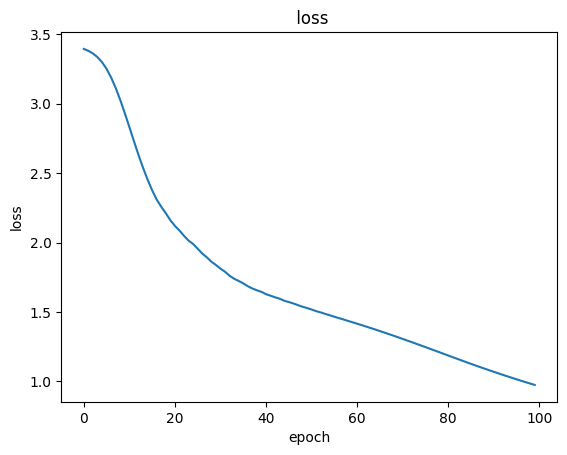

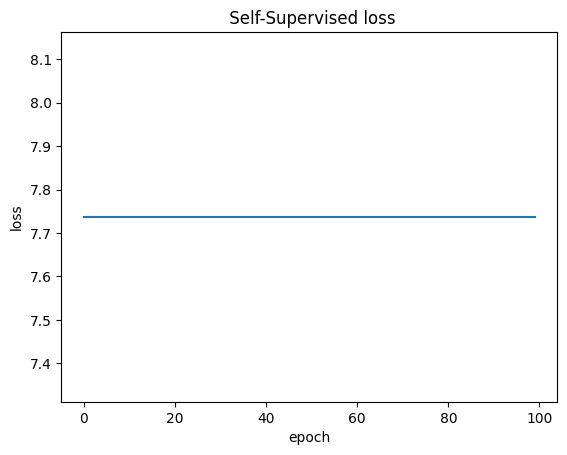

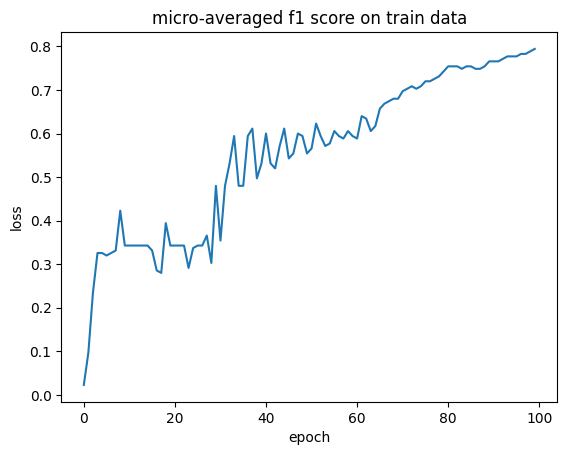

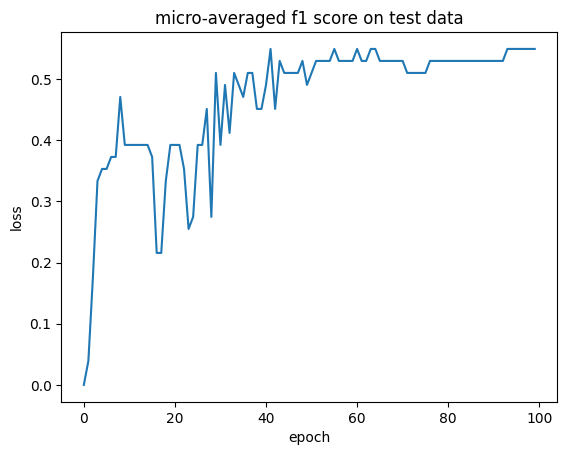

SSL flag:  True test f1-score:  0.5490196078431373


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ssl_flag = True

best_values = optuna_training.run(number_of_trials=20)
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)

model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(best_values, plot_training_procces=True)
print('SSL flag: ', ssl_flag,'test f1-score: ', test_acc_mi)

# Рассмотрим следующий датасет texas

In [5]:
root = '../data_validation/'
name='texas'
dataset = Graph(root=root + str(name), name=name, transform=T.NormalizeFeatures(),adjust_flag=False)
data = dataset[0]
len(data.x)

183

In [6]:
loss_name='APP'

[I 2022-12-19 19:45:34,036] A new study created in memory with name: no-name-77e723ab-548c-4255-a4ea-e6975d588768
[I 2022-12-19 19:45:39,287] Trial 0 finished with value: 0.2777777777777778 and parameters: {'hidden_layer': 32, 'dropout': 0.1, 'size of network, number of convs': 2, 'lr': 0.006498826815422205, 'coef': 0}. Best is trial 0 with value: 0.2777777777777778.
[I 2022-12-19 19:45:41,641] Trial 1 finished with value: 0.2777777777777778 and parameters: {'hidden_layer': 64, 'dropout': 0.5, 'size of network, number of convs': 1, 'lr': 0.006017962290060313, 'coef': 5}. Best is trial 0 with value: 0.2777777777777778.
[I 2022-12-19 19:45:44,058] Trial 2 finished with value: 0.6111111111111112 and parameters: {'hidden_layer': 32, 'dropout': 0.2, 'size of network, number of convs': 1, 'lr': 0.005081828692146301, 'coef': 0}. Best is trial 2 with value: 0.6111111111111112.
[I 2022-12-19 19:45:50,989] Trial 3 finished with value: 0.6111111111111112 and parameters: {'hidden_layer': 64, 'drop

Loss: 1.0532, Epoch: 099, test acc micro: 0.5405, test acc macro: 0.3085


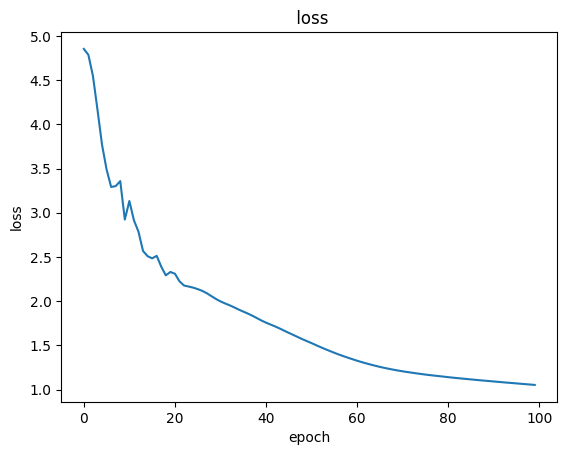

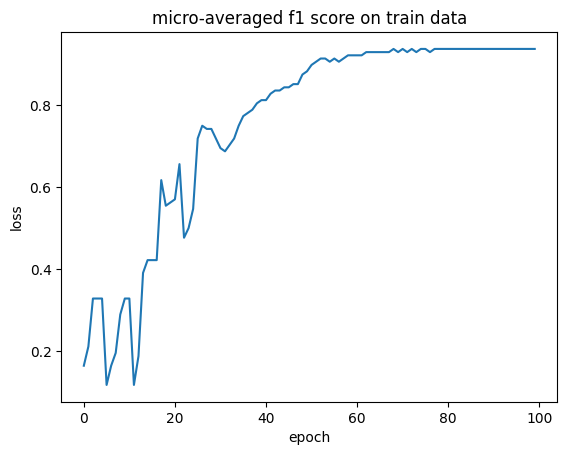

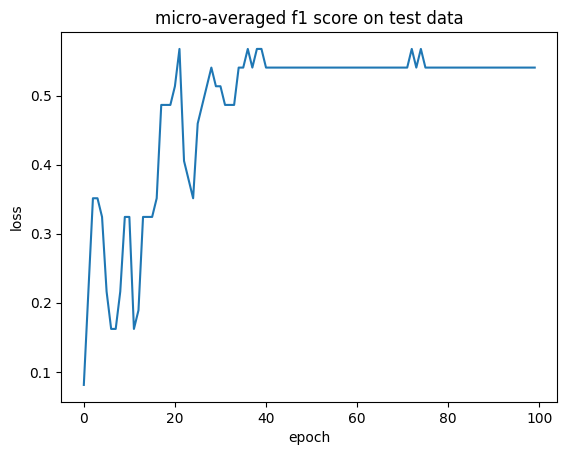

SSL flag:  False test f1-score:  0.5405405405405406


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ssl_flag = False
optuna_training = TrainModelOptunaNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)

best_values = optuna_training.run(number_of_trials=20)
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)

model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(best_values, plot_training_procces=True)
print('SSL flag: ', ssl_flag,'test f1-score: ', test_acc_mi)

[I 2022-12-19 19:47:48,656] A new study created in memory with name: no-name-025f9f49-e3e3-4d95-b5d2-b50b295b486d
[I 2022-12-19 19:47:51,171] Trial 0 finished with value: 0.0 and parameters: {'hidden_layer': 64, 'dropout': 0.0, 'size of network, number of convs': 1, 'lr': 0.00907163568857789, 'coef': 20}. Best is trial 0 with value: 0.0.
[I 2022-12-19 19:47:53,689] Trial 1 finished with value: 0.5555555555555556 and parameters: {'hidden_layer': 128, 'dropout': 0.4, 'size of network, number of convs': 1, 'lr': 0.005623987672701522, 'coef': 5}. Best is trial 1 with value: 0.5555555555555556.
[I 2022-12-19 19:48:00,054] Trial 2 finished with value: 0.6111111111111112 and parameters: {'hidden_layer': 256, 'dropout': 0.4, 'size of network, number of convs': 2, 'lr': 0.008593100574283842, 'coef': 5}. Best is trial 2 with value: 0.6111111111111112.
[I 2022-12-19 19:48:07,395] Trial 3 finished with value: 0.6111111111111112 and parameters: {'hidden_layer': 64, 'dropout': 0.5, 'size of network,

Loss: 0.7054, Epoch: 099, test acc micro: 0.6486, test acc macro: 0.3970


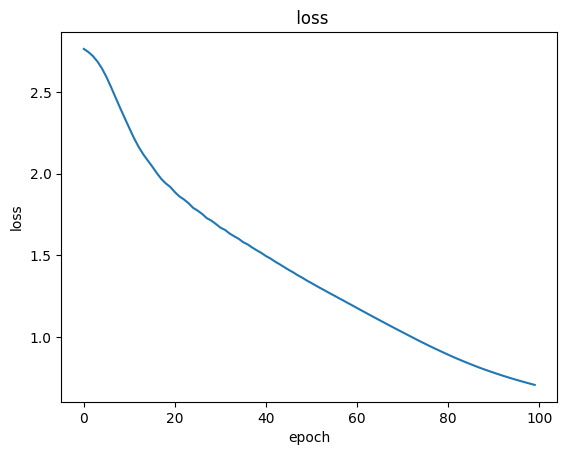

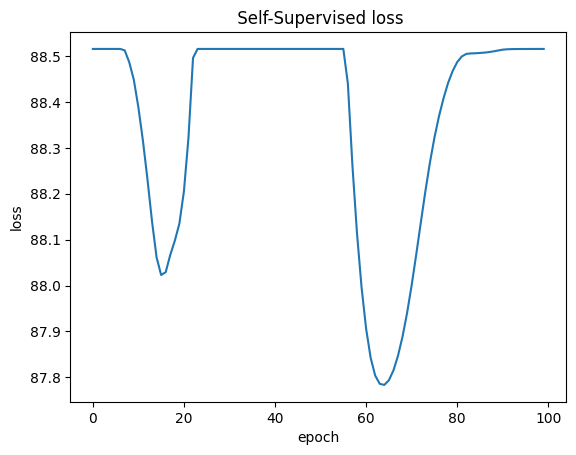

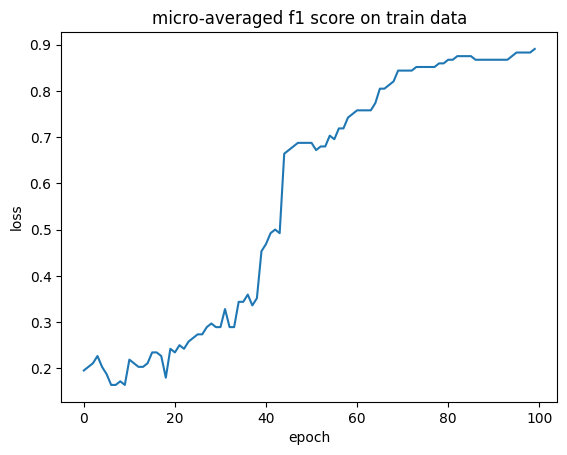

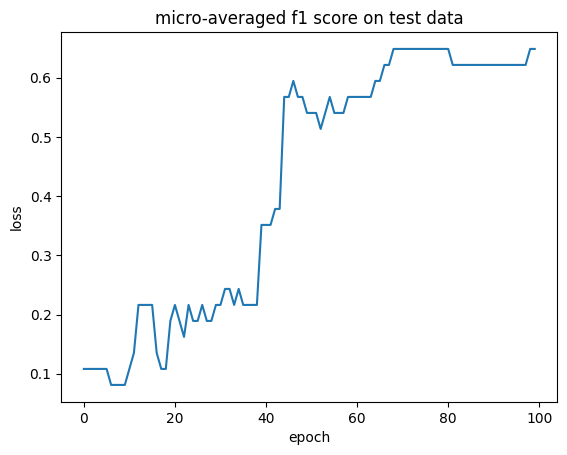

SSL flag:  True test f1-score:  0.6486486486486487


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ssl_flag = True
optuna_training = TrainModelOptunaNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)

best_values = optuna_training.run(number_of_trials=20)
model_training = TrainModelNC(data=dataset, device=device, ssl_flag=ssl_flag, loss_name=loss_name)

model, train_acc_mi, train_acc_ma, test_acc_mi, test_acc_ma = model_training.run(best_values, plot_training_procces=True)
print('SSL flag: ', ssl_flag,'test f1-score: ', test_acc_mi)